In [1]:
!pip install category_encoders

import pandas as pd
import category_encoders as ce
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.1 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Lung Cancer.csv to Lung Cancer.csv


In [4]:

df = pd.read_csv("Lung Cancer.csv")

Reduced dataset saved as IT24100693_VarianceThreshold.csv


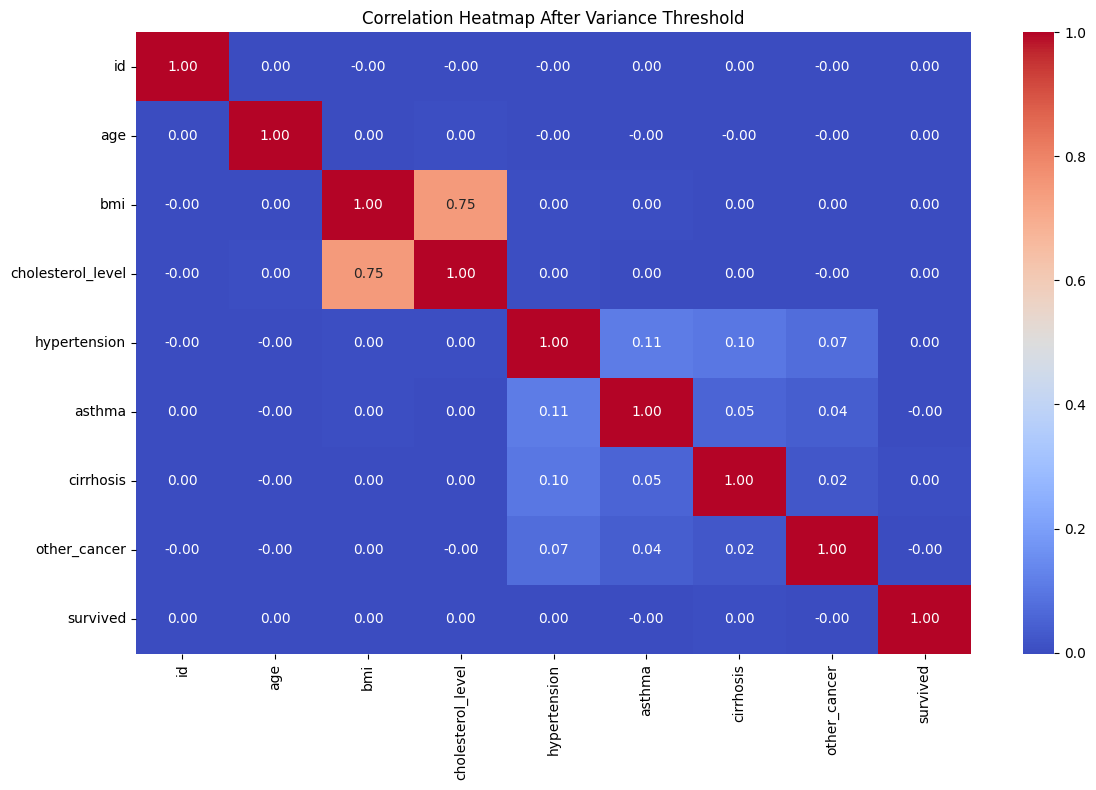

In [5]:
target = "survived"

y = df[target]
X = df.drop(columns=[target])

encoder = ce.TargetEncoder(cols=X.select_dtypes(include=['object']).columns)
X_encoded = encoder.fit_transform(X, y)

# Apply variance threshold for feature selection
selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X_encoded)

selected_features = X_encoded.columns[selector.get_support()]

df_selected = pd.DataFrame(X_reduced, columns=selected_features)
df_selected[target] = y

df_selected.to_csv("IT24100693_VarianceThreshold.csv", index=False)
print("Reduced dataset saved as IT24100693_VarianceThreshold.csv")

corr = df_selected.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap After Variance Threshold")
plt.tight_layout()
plt.show()

In [6]:
files.download("/content/IT24100693_VarianceThreshold.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>